In [44]:
import json


model_names = ["gpt-4o-2024-05-13", "gpt-3.5-turbo-0125", "llama3:70b", "llama3:8b"]

models_context_sources = []

for model_name in model_names:
    print(model_name)
    file_name = f"../data/results/config2/all_dependencies_all_{model_name}.json"

    context_sources = []


    with open(file_name, "r", encoding="utf-8") as src:
        data = json.load(src)

    for entry in data:
        context = entry["context"]
        sources = [x["index"] for x in context]

        context_sources.append(sources)

    models_context_sources.append({
        model_name: context_sources
    })

gpt-4o-2024-05-13
gpt-3.5-turbo-0125
llama3:70b
llama3:8b


In [17]:
model_names = ["gpt-4o-2024-05-13", "gpt-3.5-turbo-0125", "llama3:70b", "llama3:8b"]

validation_models_context_sources = []

for model_name in model_names:
    print(model_name)
    file_name = f"../data/results/holdout/holdout_all_{model_name}.json"

    context_sources = []


    with open(file_name, "r", encoding="utf-8") as src:
        data = json.load(src)

    for entry in data:
        context = entry["context"]
        sources = [x["index"] for x in context]

        context_sources.append(sources)

    validation_models_context_sources.append({
        model_name: context_sources
    })

gpt-4o-2024-05-13
gpt-3.5-turbo-0125
llama3:70b
llama3:8b


In [46]:
refined_data = validation_models_context_sources[0]["gpt-4o-2024-05-13"]
                                                    
refined_data

[['so-posts', 'so-posts', 'so-posts', 'web-search', 'tech-docs'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'tech-docs'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'tech-docs'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['so-posts', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['web-search', 'web-search', 'web-search', 'tech-docs', 'web-search'],
 ['web-search', 'web-search', 'tech-docs', 'web-search', 'web-search'],
 ['web-search', 'tech-docs', 'web-search', 'web-search', 'web-search'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'so-posts'],
 ['web-search', 'web-search', 'web-search', 'tech-docs', 'web-search'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['tech-docs', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['web-search', 'web-search', 'so-posts', 'so-posts', 'web-search'],


In [26]:
data = models_context_sources[0]["gpt-4o-2024-05-13"]

count=0
for x in data:
    if x[0] == "web-search":
        count += 1

print(count)

415


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

colors = ["#3E7F94", "#FFFFFF", "#C4583D"]  # Light blue to white to red
n_bins = 100  # Increase or decrease to change how smooth the color transitions are

# Create a custom colormap
custom_colormap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

Text(58.22222222222221, 0.5, 'Context Source')

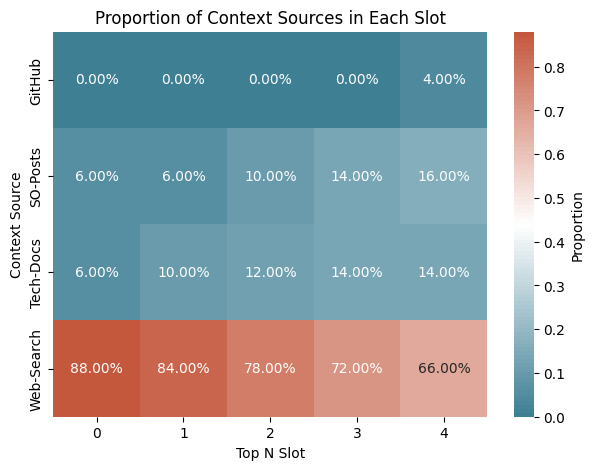

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = models_context_sources[0]["gpt-4o-2024-05-13"]

with open("data/context_sources.json", "w", encoding="utf-8") as dest:
    json.dump(data, dest, indent=2)

refined_data = validation_models_context_sources[0]["gpt-4o-2024-05-13"]


# Define a dictionary for replacements
replacements = {
    "tech-docs": "Tech-Docs",
    "so-posts": "SO-Posts",
    "github": "GitHub",
    "web-search": "Web-Search"
}

# Apply the replacements
updated_data = [
    [replacements.get(item, item) for item in sublist] for sublist in data
]

# Apply the replacements
updated_refined_data = [
    [replacements.get(item, item) for item in sublist] for sublist in refined_data
]


df = pd.DataFrame(updated_refined_data)

result = pd.DataFrame({
    slot: df[slot].value_counts(normalize=True) for slot in df.columns
}).fillna(0)  # Fill missing values with 0


# sns.color_palette("Set2")
# sns.cubehelix_palette(as_cmap=True)
#sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
# sns.light_palette("seagreen", as_cmap=True)

# Prepare the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(result, annot=True, cmap=custom_colormap, fmt=".2%", cbar_kws={'label': 'Proportion'})
plt.title("Proportion of Context Sources in Each Slot")
plt.xlabel("Top N Slot")
plt.ylabel("Context Source")

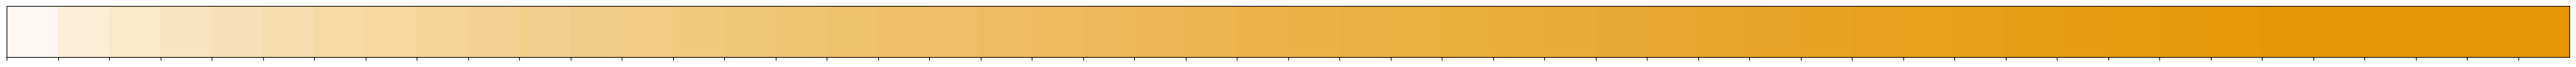

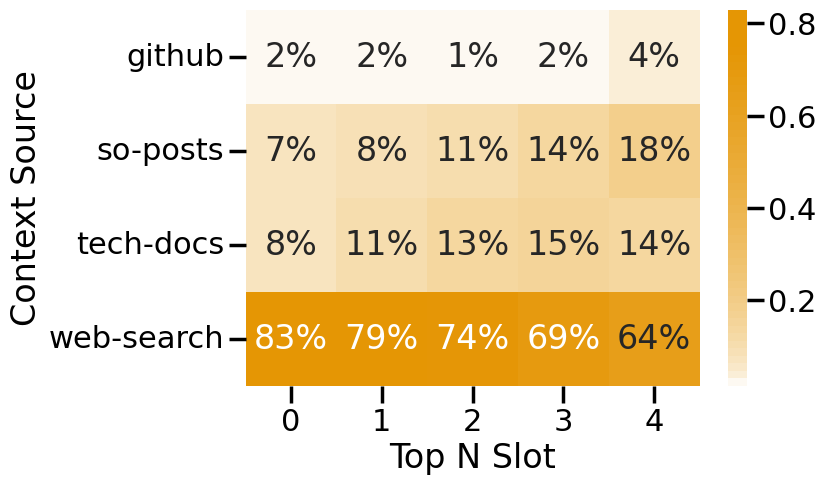

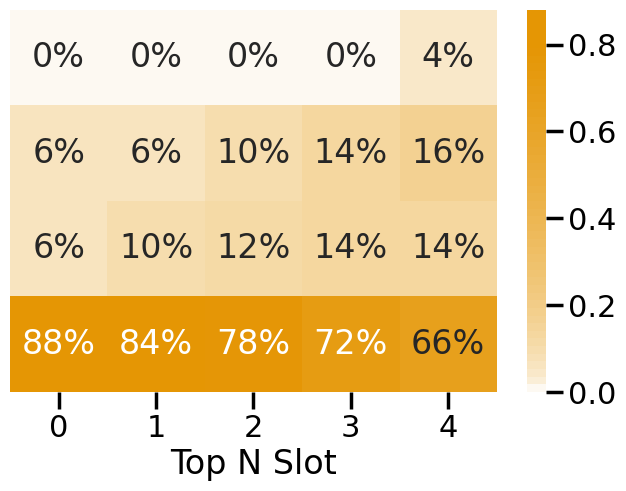

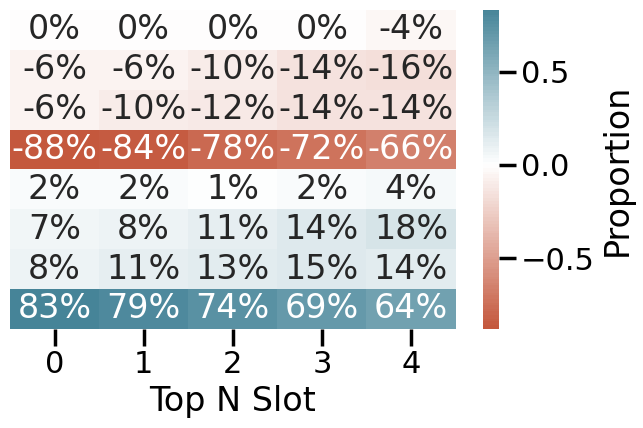

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import seaborn as sns
import numpy as np
import colorsys

# Create the color palettes for the individual and difference heatmaps
# saturated_colors = sns.light_palette("seagreen", as_cmap=True)


# Create a palette from a desaturated tone to the target color
# Define the target color
target_color = "#e59604"

# Now we will adjust the saturation and lightness so that desaturated colors move towards pure white (RGB = 255, 255, 255) instead of gray.
# This requires a more direct approach to blend towards white as saturation decreases.

def adjust_saturation_to_white(hex_color, saturation_factor):
    # Convert hex to RGB
    hex_color = hex_color.lstrip('#')
    r, g, b = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

    # Convert RGB to HLS (Hue, Lightness, Saturation)
    h, l, s = colorsys.rgb_to_hls(r, g, b)

    # Adjust saturation factor and move towards white
    new_s = min(1, saturation_factor)  # Ensure saturation does not exceed 1

    # Blend towards white by mixing with (1,1,1) as saturation decreases
    blend_factor = 1 - new_s
    r_new = r + blend_factor * (1 - r)
    g_new = g + blend_factor * (1 - g)
    b_new = b + blend_factor * (1 - b)

    return (int(r_new * 255), int(g_new * 255), int(b_new * 255))

# Create a palette where desaturated colors move directly toward white
saturation_factors = np.linspace(0, 1, 50)**1.14
palette_white_shift = [adjust_saturation_to_white(target_color, 0.05 + factor**0.5 ) for factor in saturation_factors]

# Convert RGB values back to hex for visualization
palette_white_shift_hex = ['#%02x%02x%02x' % rgb for rgb in palette_white_shift]

# Visualize the new palette where desaturated colors tend to white
sns.palplot(palette_white_shift_hex)
plt.show()



saturated_colors = palette_white_shift_hex
diverging_colors = LinearSegmentedColormap.from_list("diverging", ["#3E7F94", "#FFFFFF", "#C4583D"][::-1],
                                                     N=100)  # Diverging palette


# Heatmap generation function with adjustable colormap and title
def create_heatmap(dataframe, cmap, title, xlabel, ylabel, file_name, center=None, show_ylabel=True, show_yticks=True,
                   show_cbar_label=True, ratio = 4.3 / 7, scale_adjust = 1.0):
    with sns.plotting_context("poster"):
        scaling = 1.25 *scale_adjust # 0.65
        width = 7 * scaling
        plt.figure(figsize=(width, width * ratio))
        ax = sns.heatmap(dataframe, annot=True, cmap=cmap, fmt=".0%",
                         cbar_kws={'label': 'Proportion' if show_cbar_label else None}, center=center)

        plt.title("")  # Disable the title
        plt.xlabel(xlabel)

        if show_ylabel:
            plt.ylabel(ylabel)
        else:
            plt.ylabel("")

        if not show_yticks:
            ax.set_yticks([])  # Remove y-tick labels

        plt.tight_layout()
        plt.savefig(file_name, bbox_inches='tight', pad_inches=0)
        plt.show()


# Function to process JSON file and calculate proportions
def process_file(file_path):
    df = pd.read_json(file_path)
    result = pd.DataFrame({
        slot: df[slot].value_counts(normalize=True) for slot in df.columns
    }).fillna(0)  # Fill missing values with 0
    return result


# Function to calculate the difference between two dataframes
def compute_difference(df1, df2):
    df1, df2 = df1.align(df2, fill_value=0)  # Align to ensure structure is the same
    return df1 - df2


# Main function to process both files and generate heatmaps
def process_and_generate_heatmaps(file_path_1, file_path_2):
    # Process both files
    result_1 = process_file(file_path_1)
    result_2 = process_file(file_path_2)

    # Generate individual heatmaps
    create_heatmap(result_1, saturated_colors, "Proportion of Context Sources per Slot", "Top N Slot",
                   "Context Source", "figures/context.pdf", show_ylabel=True, show_yticks=True, show_cbar_label=False)

    create_heatmap(result_2, saturated_colors, "Proportion of Context Sources per Slot", "Top N Slot",
                   "", "figures/context_refined.pdf", show_ylabel=False, show_yticks=False, show_cbar_label=False, ratio = 5.5 / 7, scale_adjust=0.79)

    # Compute and generate difference heatmap with diverging palette and center threshold at 0
    difference = compute_difference(result_1, result_2)
    create_heatmap(difference, diverging_colors, "Difference in Proportion of Context Sources", "Top N Slot",
                   "", "figures/context_difference.pdf", center=0.0, show_ylabel=False, show_yticks=False, show_cbar_label=True, ratio = 4.8 / 7, scale_adjust=0.8)


# Paths to the JSON files
file_path_1 = '../evaluation/data/context_sources.json'
file_path_2 = '../evaluation/data/context_sources_refined.json'

# Run the entire workflow
process_and_generate_heatmaps(file_path_1, file_path_2)